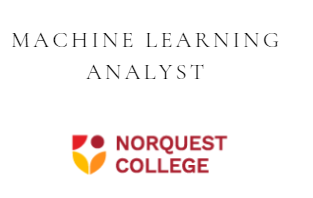

# Islamic Family Sample App

In [1]:
#install streamlit, one time execution
!pip install streamlit joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [2]:
#import streamlit
import streamlit as st

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay

In [4]:
from geopy.geocoders import Nominatim
import time
import pandas as pd

# Broad areas you want to geocode
areas = [
    "NAIT/Kingway", "Boyle Street/McCauley", "Castle Downs", "Alberta Avenue",
    "Mill Woods", "Blue Quill", "Strathcona", "Jasper Place", "Bonnie Doon",
    "West Edmonton", "Calder/Kensington", "Oliver/Downtown", "Albany/Cumberland",
    "North Central", "University Area", "Meadowlark/Jasper Place", "Downtown",
    "Red Deer", "The Meadows"
]

geolocator = Nominatim(user_agent="edmonton_hamper_mapping")
results = []

for area in areas:
    try:
        location = geolocator.geocode(f"{area}, Edmonton, Alberta", timeout=10)
        if location:
            results.append({'broad_area': area, 'Latitude': location.latitude, 'Longitude': location.longitude})
        else:
            results.append({'broad_area': area, 'Latitude': None, 'Longitude': None})
    except Exception as e:
        results.append({'broad_area': area, 'Latitude': None, 'Longitude': None})
    time.sleep(1)

# Save to CSV
df_coords = pd.DataFrame(results)
df_coords.to_csv("geocoded_broad_areas.csv", index=False)


In [47]:
import joblib

# Load the model
xgb_model = joblib.load('xgb_model.pkl')

# Get the feature names
booster = xgb_model.get_booster()
feature_names = booster.feature_names
print(feature_names)


['dependents_qty', 'primary_client_key', 'house_number', 'distance_km', 'month', 'week_of_month', 'broad_area_encoded', 'requests_per_household', 'Average household size', 'Couple-family households with children', 'Multigenerational households', 'One-parent families in which the parent is a man+', 'One-parent families in which the parent is a woman+', 'Persons not in census families - Living alone', 'Total one-parent families']


In [53]:
import pandas as pd

# Dummy data for testing prediction
dummy_data = pd.DataFrame({
    'dependents_qty': [1],
    'primary_client_key': [0],
    'house_number': [0],
    'distance_km': [5.0],
    'month': [3],
    'requests_per_household': [2.5],
    'week_of_month': [2],
    'Average household size': [4.0],
    'broad_area_encoded': [1],  # Assuming this is pre-encoded
    'Couple-family households with children': [0],
    'Multigenerational households': [0],
    'One-parent families in which the parent is a man+': [0],
    'One-parent families in which the parent is a woman+': [0],
    'Persons not in census families - Living alone': [0],
    'Total one-parent families': [0]
})

# Print the columns of input data
print("Input data columns:", dummy_data.columns)

# Compare with the feature names the model was trained on
print("Feature names the model was trained on:", feature_names)

# Now reorder input data to match the model's feature names
dummy_data = dummy_data[feature_names]
print("Reordered input data columns:", dummy_data.columns)
# After ensuring that the column order matches the model's expected order, proceed with the prediction
hamper_pred = regressor.predict(dummy_data)

# Print the result
print(f"Predicted Hamper Demand: {hamper_pred[0]}")


Input data columns: Index(['dependents_qty', 'primary_client_key', 'house_number', 'distance_km',
       'month', 'requests_per_household', 'week_of_month',
       'Average household size', 'broad_area_encoded',
       'Couple-family households with children',
       'Multigenerational households',
       'One-parent families in which the parent is a man+',
       'One-parent families in which the parent is a woman+',
       'Persons not in census families - Living alone',
       'Total one-parent families'],
      dtype='object')
Feature names the model was trained on: ['dependents_qty', 'primary_client_key', 'house_number', 'distance_km', 'month', 'week_of_month', 'broad_area_encoded', 'requests_per_household', 'Average household size', 'Couple-family households with children', 'Multigenerational households', 'One-parent families in which the parent is a man+', 'One-parent families in which the parent is a woman+', 'Persons not in census families - Living alone', 'Total one-parent fa

In [155]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# Load the dataset with a specified encoding

# Page 1: Dashboard
def dashboard():
   st.image('Islamic Family.webp', caption="Islamic Family", use_container_width=True)

      # Add logos on the right (col3)

      # Highlight the project title
   st.title("Islamic Family Hamper Distribution Dashboard")

    # Add three summary statistics cards
   st.write("### Project Highlights")
   col1, col2, col3 = st.columns(3)
   col1.metric(label="Food hampers distributed monthly", value="2000+")
   col2.metric(label="Total volunteers engaged", value="2100")
   col3.metric(label="Neighborhoods Covered", value="40+")

    # Use tabs to organize content
   tab1, tab2, tab3 = st.tabs(["Abstract", "What the Project Does", "Inspiration"])

    # Abstract Tab
   with tab1:
        st.write("💡 **Abstract**")
        st.info(
            """
            This project focuses on identifying high-demand neighborhoods in Edmonton for Islamic food hamper distribution. Using past distribution records
            and socio-economic data, we built a machine learning model to predict which areas need the most support. The process involved data cleaning, analysis,
             and training regression and classification models. Our goal is to help Islamic organizations allocate resources more effectively and equitably.
            """
        )

    # What the Project Does Tab
   with tab2:
        st.write("👨🏻‍💻 **What Our Project Does**")
        bullet_points = [
            "Predicts food hamper demand across Edmonton neighborhoods using machine learning.",
            "Identifies key socio-economic factors influencing high-need areas.",
            "Analyzes past distribution data to uncover patterns and trends.",
            "Visualizes geographic and temporal trends in hamper distribution.",
            "Enhances planning for future food drives with data-driven insights.",
        ]
        for point in bullet_points:
            st.markdown(f"- {point}")

    # Inspiration Tab
   with tab3:
        st.write("🌟 **Inspiration**")
        st.warning(
            """
            The inspiration for this project came from the Islamic community’s ongoing efforts to support vulnerable families
             in Edmonton through food drives. While the intention and effort are strong, many of these initiatives face challenges
              in identifying which neighborhoods need the most support. By combining data science with community service, we aim to
               help Islamic organizations distribute food more effectively, ensuring that help reaches those who need it the most. Our goal is to turn compassion into targeted action through the power of data..
            """
        )
import streamlit as st
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns

import streamlit as st

def eda_page():
    st.title("📊 Exploratory Data Analysis")
    st.write("Click below to expand each insight:")

    with st.expander("📆 EDA insights"):
        st.image('Screenshot(132).png', use_column_width=True)



    with st.expander("📊 Correlation Heatmap"):
        st.image('download.jpg', use_column_width=True)







def explainable_ai_page():
    st.title("🧠 Explainable AI Insights")
    st.write("### Understanding What Drives Food Hamper Needs")

    # Load model
    booster = xgb.Booster()
    booster.load_model("xgb_model.json")

    # Load data
    X_train = pd.read_csv("X_train.csv")
    X_test = pd.read_csv("X_test.csv")
    y_test = pd.read_csv("y_test.csv")

    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.iloc[:, 0]

    # Predict using Booster and DMatrix
    y_pred = booster.predict(xgb.DMatrix(X_test))

    # If output is 2D (multi-output), use only column 0
    if y_pred.ndim == 2:
        y_pred = y_pred[:, 0]

    # Now calculate residuals
    residuals = np.ravel(y_test) - np.ravel(y_pred)

    # Residuals
    y_pred = np.ravel(y_pred)
    y_test = np.ravel(y_test.values)
    residuals = y_test - y_pred

    # 📉 Residual Plot
    st.subheader("📉 Residual Plot")
    fig1, ax1 = plt.subplots()
    sns.scatterplot(x=y_pred, y=residuals, ax=ax1)
    ax1.axhline(0, color='red', linestyle='--')
    ax1.set_xlabel("Predicted Hamper Demand")
    ax1.set_ylabel("Residuals")
    ax1.set_title("Residual Plot for Hamper Demand")
    st.pyplot(fig1)

    # 🧠 SHAP Summary Plot
    st.subheader("📌 SHAP Summary Plot")

    # Create SHAP explainer
    explainer = shap.Explainer(booster)
    shap_values = explainer(X_test)

    # Plot to matplotlib figure and display in Streamlit
    st.subheader("SHAP Summary Plot - Hamper Demand")

    fig_summary, ax_summary = plt.subplots()
    shap.summary_plot(shap_values.values, X_test, show=False)
    st.pyplot(fig_summary)

        # Only keep first target's SHAP values (hamper_demand)
    X_test_shap = pd.read_csv("X_test.csv")  # ← this loads your SHAP input
    shap_values = explainer(X_test_shap)

    shap_vals_hamper = shap_values.values  # ✅ correct for regression

    # Check shape consistency
    if shap_vals_hamper.shape[0] != X_test_shap.shape[0]:
        st.error("Mismatch in SHAP values and test data samples!")
    else:
        # Compute mean importance
        shap_importance = np.abs(shap_vals_hamper).mean(axis=0)
        top_indices = np.argsort(shap_importance)[-5:][::-1]

        top_features = [X_test_shap.columns[i] for i in top_indices]

        st.subheader("Dependence Plots (Top 5)")
    for feature in top_features:
      st.write(f"SHAP Dependence Plot: {feature}")
      shap.dependence_plot(feature, shap_vals_hamper, X_test_shap, show=False)
      fig = plt.gcf()
      st.pyplot(fig)
      plt.clf()




    st.success("SHAP-based insights generated using the XGBoost `.json` model.")
# Page 3: Machine Learning Modeling
import streamlit as st
import pandas as pd
import pickle

def machine_learning_modeling():
    st.title("📦 Hamper Demand Prediction")
    st.write("Fill in the household and request details below:")

    try:
        # 📥 User Inputs
        dependents = st.number_input("👨‍👩‍👧 Number of Dependents", min_value=0)
        distance = st.number_input("📍 Distance (km) from center", min_value=0.0)
        month = st.selectbox("📆 Month", list(range(1, 13)))
        requests = st.number_input("📝 Requests per Household", min_value=0.0)
        week = st.selectbox("📅 Week of Month", [1, 2, 3, 4])
        avg_size = st.number_input("👥 Average Household Size", min_value=0.0)

        # 📍 Broad Area selection (full list)
        broad_areas = [
            'Londonderry', 'NAIT/Kingway', 'Boyle Street/McCauley', 'Windermere', 'Castle Downs',
            'Northeast Edmonton', 'Clareview', 'Alberta Avenue', 'Mill Woods', 'Blue Quill',
            'Strathcona', 'Jasper Place', 'Malmo Plains', 'Bonnie Doon', 'Ellerslie',
            'West Edmonton', 'Calder/Kensington', 'Oliver/Downtown', 'Albany/Cumberland',
            'Beverly', 'North Central', 'University Area', 'Meadowlark/Jasper Place', 'Eastgate',
            'Capilano', 'The Hamptons', 'Terwillegar', 'Downtown', 'Red Deer', 'The Meadows', 'Camrose'
        ]
        broad_area_mapping = {area: idx for idx, area in enumerate(broad_areas)}
        broad_area = st.selectbox("🏘️ Broad Area", broad_areas)
        broad_area_encoded = broad_area_mapping[broad_area]

        # 👻 Default socio-economic features (dummy values for now)
        input_data = pd.DataFrame([{
            'dependents_qty': dependents,
            'primary_client_key': 0,
            'house_number': 0,
            'distance_km': distance,
            'month': month,
            'requests_per_household': requests,
            'week_of_month': week,
            'Average household size': avg_size,
            'broad_area_encoded': broad_area_encoded,
            'Couple-family households with children': 5265.0,
            'Multigenerational households': 195,
            'One-parent families in which the parent is a man+': 1950,
            'One-parent families in which the parent is a woman+': 2535,
            'Persons not in census families - Living alone': 1468,
            'Total one-parent families': 0
        }])

        # ✅ Ensure correct feature order (must match model exactly)
        expected_columns = [
    'dependents_qty', 'primary_client_key', 'house_number', 'distance_km', 'month',
    'requests_per_household', 'week_of_month', 'Average household size', 'broad_area_encoded',
    'Couple-family households with children', 'Multigenerational households',
    'One-parent families in which the parent is a man+',
    'One-parent families in which the parent is a woman+',
    'Persons not in census families - Living alone', 'Total one-parent families'
          ]

        input_data = input_data[expected_columns]

        # 🔍 Load Trained Model
        try:
            with open("xgb_model.pkl", "rb") as f:
                model = pickle.load(f)
        except Exception as e:
            st.error(f"❌ Failed to load model: {e}")
            return

        # 🔮 Make Prediction
        hamper_pred = model.predict(input_data.values)[0]

        # ✅ Display Result
        # 🔍 Multiply by max value used during model training to rescale
        max_hamper_value = 100  # Replace this with the actual max hamper demand from your training set
        hamper_pred = hamper_pred * max_hamper_value

        st.success(f"📦 Predicted Hamper Demand: **{int(round(hamper_pred))} hampers**")



    except Exception as e:
        st.error(f"❌ Unexpected error: {e}")

# Page 4: Neighbourhood Mapping

# Read geospatial data

import streamlit as st
import pandas as pd
import plotly.express as px

def hamper_demand_map():
    st.title("📍 Hamper Demand Map by Broad Area")

    # Load main data and combined coordinates
    df = pd.read_csv("df_merged_backup.csv")
    coords = pd.read_csv("geocoded_broad_areas.csv")
    manual_coords = pd.read_csv("location.csv")

    # Clean and combine both coordinate sources
    coords['broad_area'] = coords['broad_area'].astype(str).str.strip().str.title()
    manual_coords = manual_coords.rename(columns={"Neighbourhood": "broad_area"})
    manual_coords['broad_area'] = manual_coords['broad_area'].astype(str).str.strip().str.title()

    # Combine both sources
    all_coords = pd.concat([manual_coords[['broad_area', 'Latitude', 'Longitude']],
                            coords[['broad_area', 'Latitude', 'Longitude']]])
    all_coords = all_coords.drop_duplicates(subset='broad_area', keep='first')

    # Prepare df and merge with coordinates
    df['broad_area_clean'] = df['broad_area'].astype(str).str.strip().str.title()
    df = pd.merge(df, all_coords, left_on='broad_area_clean', right_on='broad_area', how='left')
    df = df.dropna(subset=['Latitude', 'Longitude'])

    # Group data for plotting
    summary = df.groupby('broad_area_clean', as_index=False).agg({
        'hamper_demand': lambda x: int(round(x.mean())),
        'Latitude': 'first',
        'Longitude': 'first'
    })

    # Plot
    fig = px.scatter_mapbox(
        summary,
        lat='Latitude',
        lon='Longitude',
        color='hamper_demand',
        hover_name='broad_area_clean',
        hover_data={'hamper_demand': True},
        zoom=10,
        title="Hamper Demand by Broad Area"
    )
    fig.update_layout(mapbox_style='open-street-map')
    st.plotly_chart(fig)
# Page 5: Data Collection
def data_collection():
    st.title("Registration form")
    st.write("Please fill out the Google form to register to be a member of Islamic Family!")
    google_form_url = "https://docs.google.com/forms/d/e/1FAIpQLSdAczaPFRHCfVeq-qOVkHwn9QE3aCR5I-1xkJhV0XImfWF9Xg/viewform?usp=dialog"
    st.markdown(f"[Fill out the form]({google_form_url})")

def thank_you_page():
    st.title("Thank You to Our Stakeholders!")

    # Add a thank you message
    st.write(
        """
        We extend our heartfelt gratitude to our amazing stakeholders for their invaluable support in making this project a success.
        Your contributions and dedication have made a meaningful impact on our community.
        """
    )

    # Create a layout with columns for displaying logos
    st.write("### Our Stakeholders:")
    st.image('67364fb3e83436f479ca372a_IF-Homepage-Hero.webp', caption="The Islamic Family", use_container_width=True)


    # Add a footer with a final thank you message
    st.write("---")
    st.subheader("Together, we are making a difference!")



# Main App Logic
def main():
    st.sidebar.title("Islamic Family App")
    app_page = st.sidebar.radio("Select a Page", ["Dashboard", "EDA", "Neighbourhood Mapping", "ML Modelling","Explainable AI", "Data Collection","Thank You"])

    if app_page == "Dashboard":
        dashboard()
    elif app_page == "eda_page":
        eda_page()
    elif app_page == "Neighbourhood Mapping":
        hamper_demand_map()
    elif app_page == "ML Modeling":
        machine_learning_modeling()
    elif app_page == "Explainable AI":
        explainable_ai_page()
    elif app_page == "Data Collection":
        data_collection()
    elif app_page == "Thank You":
        thank_you_page()


if __name__ == "__main__":
    main()


Overwriting app.py


## Install localtunnel

In [156]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦
up to date, audited 23 packages in 1s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠦

## Run streamlit in background

In [157]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.168.234.94


Copy this IP address.

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [158]:
!npx localtunnel --port 8501

⠙your url is: https://petite-gifts-tie.loca.lt
^C
